In [1]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import json


column_n = ['NewsId', 'Category', 'SubCat', 'Title', 'Abstract', 'url', 'TitleEnt', 'AbstractEnt']
column_b = ['ImpressionId', 'UserId', 'Time', 'History', 'Impressions']

# import the datasets
test_n_df = pd.read_csv('/content/news.tsv', sep='\t', header=None, names=column_n)
test_b_df = pd.read_csv('/content/behaviors.tsv', sep='\t', header=None, names=column_b)
train_n_df = pd.read_csv('/content/news.tsv', sep='\t', header=None, names=column_n)
train_b_df = pd.read_csv('/content/behaviors.tsv', sep='\t', header=None, names=column_b)
valid_n_df = pd.read_csv('/content/news.tsv', sep='\t', header=None, names=column_n)
valid_b_df = pd.read_csv('/content/behaviors.tsv', sep='\t', header=None, names=column_b)

In [8]:
test_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsId       51282 non-null  object
 1   Category     51282 non-null  object
 2   SubCat       51282 non-null  object
 3   Title        51282 non-null  object
 4   Abstract     48616 non-null  object
 5   url          51282 non-null  object
 6   TitleEnt     51279 non-null  object
 7   AbstractEnt  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [9]:
train_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsId       51282 non-null  object
 1   Category     51282 non-null  object
 2   SubCat       51282 non-null  object
 3   Title        51282 non-null  object
 4   Abstract     48616 non-null  object
 5   url          51282 non-null  object
 6   TitleEnt     51279 non-null  object
 7   AbstractEnt  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [10]:
valid_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsId       51282 non-null  object
 1   Category     51282 non-null  object
 2   SubCat       51282 non-null  object
 3   Title        51282 non-null  object
 4   Abstract     48616 non-null  object
 5   url          51282 non-null  object
 6   TitleEnt     51279 non-null  object
 7   AbstractEnt  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [13]:
test_b_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ImpressionId  156965 non-null  int64 
 1   UserId        156965 non-null  object
 2   Time          156965 non-null  object
 3   History       153727 non-null  object
 4   Impressions   156965 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
train_b_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ImpressionId  156965 non-null  int64 
 1   UserId        156965 non-null  object
 2   Time          156965 non-null  object
 3   History       153727 non-null  object
 4   Impressions   156965 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
valid_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ImpressionId  156965 non-null  int64 
 1   UserId        156965 non-null  object
 2   Time          156965 non-null  object
 3   History       153727 non-null  object
 4   Impressions   156965 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,url,TitleEnt,AbstractEnt
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [18]:
test_b_df.head()

,ImpressionId,UserId,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [19]:
test_b_df['UserId'].nunique()

50000

In [20]:
print(test_n_df['Category'].unique(), test_n_df['SubCat'].nunique())
print(train_n_df['Category'].unique(), train_n_df['SubCat'].nunique())
print(valid_n_df['Category'].unique(), valid_n_df['SubCat'].nunique())

['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment' 'autos'
 'travel' 'foodanddrink' 'tv' 'finance' 'movies' 'video' 'music' 'kids'
 'middleeast' 'northamerica'] 264
['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment' 'autos'
 'travel' 'foodanddrink' 'tv' 'finance' 'movies' 'video' 'music' 'kids'
 'middleeast' 'northamerica'] 264
['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment' 'autos'
 'travel' 'foodanddrink' 'tv' 'finance' 'movies' 'video' 'music' 'kids'
 'middleeast' 'northamerica'] 264


In [21]:
# Check duplicates
duplicates = train_b_df.duplicated()
has = duplicates.any()
print(has)

False


In [22]:
test_n_df = test_n_df.drop('url', axis=1)
train_n_df = train_n_df.drop('url', axis=1)
valid_n_df = valid_n_df.drop('url', axis=1)

In [23]:
test_b_df1 = test_b_df.drop('Impressions', axis=1)
train_b_df1 = train_b_df.drop('Impressions', axis=1)
valid_b_df1 = valid_b_df.drop('Impressions', axis=1)

test_b_df1

,ImpressionId,UserId,Time,History
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740
...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...


In [24]:
unique_users = test_b_df1['UserId'].unique()
sampled_users = pd.Series(unique_users).sample(frac=0.01, random_state=42)
sampled_test = test_b_df1[test_b_df1['UserId'].isin(sampled_users)]

sampled_test

,ImpressionId,UserId,Time,History
147,148,U29542,11/10/2019 8:38:07 AM,N8548 N39699 N4690 N5212 N60608 N459 N35009 N1...
199,200,U24856,11/10/2019 5:46:08 PM,N15029 N12613 N17684 N59359 N26713 N36478
262,263,U56732,11/13/2019 3:23:29 PM,N19152 N32027 N33096 N53275 N2735
292,293,U77715,11/10/2019 8:15:34 PM,N33523 N38963 N4214 N39968 N44251 N3500 N54365...
314,315,U46023,11/11/2019 7:34:33 PM,N31202 N64086 N11071 N53024 N4868
...,...,...,...,...
156588,156589,U18342,11/13/2019 3:11:23 AM,N51483 N52545 N26549 N29910 N49223 N55167 N510...
156830,156831,U17207,11/10/2019 7:41:42 AM,N20288 N17566 N14510 N22570 N30344 N55470 N291...
156865,156866,U5806,11/12/2019 5:45:53 AM,N22185 N4893 N60206 N1445 N58235 N33247 N44942...
156938,156939,U16821,11/14/2019 11:11:48 AM,N28296 N4020 N44399 N55326 N33969 N33276 N3794...


In [25]:
print(sampled_test['UserId'].nunique(), test_b_df1['UserId'].nunique())

500 50000


In [26]:
# Split the column then explode
sampled_test['History'] = sampled_test['History'].str.split(' ')
exploded_test = sampled_test.explode('History')

In [28]:
exploded_test.info()
print(exploded_test.notnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 57595 entries, 147 to 156953
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ImpressionId  57595 non-null  int64 
 1   UserId        57595 non-null  object
 2   Time          57595 non-null  object
 3   History       57540 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB
ImpressionId    57595
UserId          57595
Time            57595
History         57540
dtype: int64


In [29]:
# Transform the column to datetime
sampled_test['Time'] = pd.to_datetime(sampled_test['Time'])

# Assign each time a time of day
def assign_time_of_day(hour):
    if 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 23:
        return 'evening'
    else:
        return 'night'

sampled_test['Time_of_Day'] = sampled_test['Time'].dt.hour.apply(lambda x: assign_time_of_day(x))

In [30]:
sampled_test.head()

,ImpressionId,UserId,Time,History,Time_of_Day
147,148,U29542,2019-11-10 08:38:07,"[N8548, N39699, N4690, N5212, N60608, N459, N3...",morning
199,200,U24856,2019-11-10 17:46:08,"[N15029, N12613, N17684, N59359, N26713, N36478]",afternoon
262,263,U56732,2019-11-13 15:23:29,"[N19152, N32027, N33096, N53275, N2735]",afternoon
292,293,U77715,2019-11-10 20:15:34,"[N33523, N38963, N4214, N39968, N44251, N3500,...",evening
314,315,U46023,2019-11-11 19:34:33,"[N31202, N64086, N11071, N53024, N4868]",evening


In [31]:
# Count the value of each time frame
sampled_test['Time_of_Day'].value_counts()

Time_of_Day
morning      735
afternoon    487
night        228
evening      170
Name: count, dtype: int64

In [32]:
# Check the time range of the dataset
earliest = sampled_test['Time'].min()
latest = sampled_test['Time'].max()
print(earliest, latest)

2019-11-09 01:35:20 2019-11-14 23:55:32


In [33]:
# Calculate the time proportion
sampled_test['Time_of_Day'].value_counts() / len(sampled_test)

Time_of_Day
morning      0.453704
afternoon    0.300617
night        0.140741
evening      0.104938
Name: count, dtype: float64

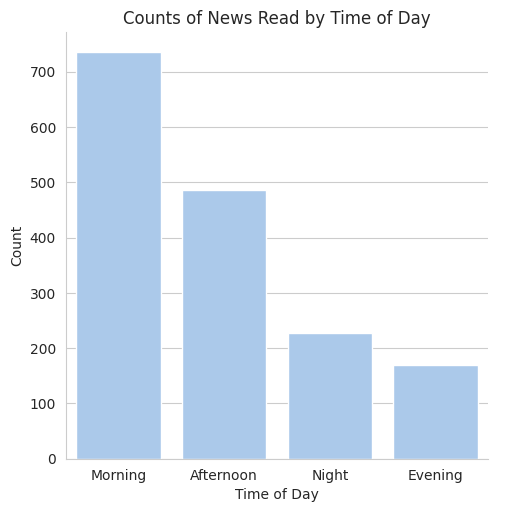

In [34]:
# Visualize using seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

time = sampled_test.copy()
time['Time_of_Day'] = time['Time_of_Day'].replace({'morning': 'Morning', 'afternoon': 'Afternoon', 'evening': 'Evening', 'night': 'Night'})
T = sns.catplot(x="Time_of_Day", kind="count", data=time, order=time['Time_of_Day'].value_counts().index, height=5, aspect=1)

for ay in T.axes.flat:
    ay.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

T.set(title='Counts of News Read by Time of Day', xlabel='Time of Day', ylabel='Count')
plt.show()

In [35]:
# Create a new column of Labels
def extract_labels(row):
    try:
        if pd.notnull(row) and isinstance(row, str):
            objects = json.loads(row)
            labels = [obj['Label'].replace(" ", "_").replace(",", "_") for obj in objects]
            return labels
        else:
            return []
    except Exception as e:
        return []

test_n_df['Labels'] = test_n_df['TitleEnt'].apply(extract_labels)
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",[Adipose_tissue]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",[]
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",[],"[{""Label"": ""National Basketball Association"", ...",[]
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...",[Skin_tag]


In [36]:
test_n_df1 = test_n_df.explode('Labels')
test_n_df1

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Prince_Philip__Duke_of_Edinburgh
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Charles__Prince_of_Wales
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Elizabeth_II
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",Adipose_tissue
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",NaN
...,...,...,...,...,...,...,...,...
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[],Broadway_theatre
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",[],[],NaN
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...","[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[],MLS_Cup
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...","[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[],Seattle_Sounders_FC


In [37]:
count_labels = test_n_df1['Labels'].value_counts()
n = 20
top_labels = count_labels.head(n)
print(top_labels)

Labels
Donald_Trump                        1501
National_Football_League             510
United_States                        398
New_England_Patriots                 392
Houston_Astros                       369
California                           339
Republican_Party_(United_States)     289
Democratic_Party_(United_States)     273
Florida                              265
Ukraine                              263
Cleveland_Browns                     238
Washington_Nationals                 233
Dallas_Cowboys                       232
Pittsburgh_Steelers                  227
World_Series                         224
Halloween                            219
Syria                                203
Baltimore_Ravens                     203
Philadelphia_Eagles                  201
Kansas_City_Chiefs                   197
Name: count, dtype: int64


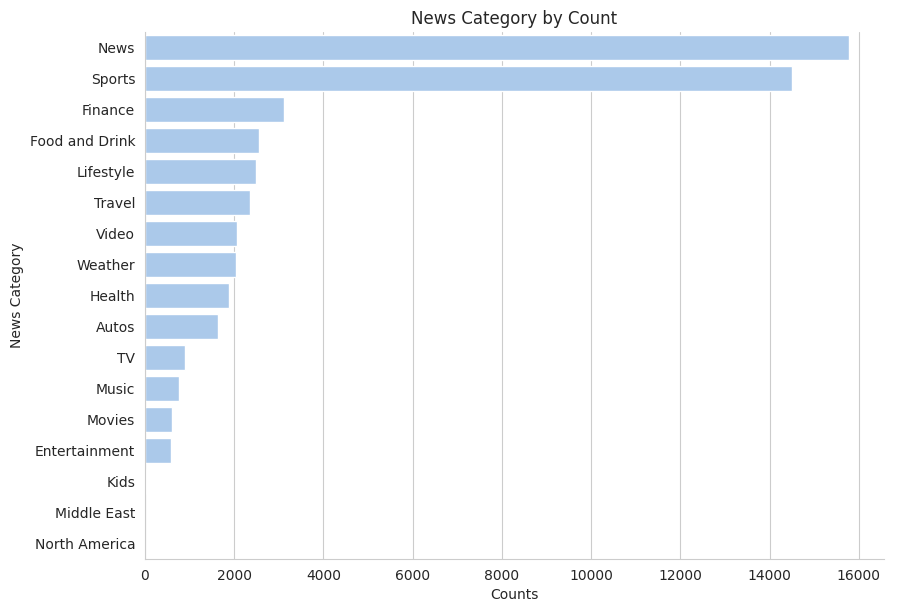

In [38]:
# Get a new dataframe for category and rename the columns
cat = test_n_df.copy()
cat['Category'] = cat['Category'].replace({
    'sports': 'Sports','news': 'News', 'finance': 'Finance', 'travel': 'Travel', 'video': 'Video', 'lifestyle': 'Lifestyle', 'foodanddrink': 'Food and Drink',
    'weather': 'Weather', 'autos': 'Autos', 'health': 'Health', 'music': 'Music', 'tv': 'TV', 'entertainment': 'Entertainment', 'movies': 'Movies',
    'kids': 'Kids', 'middleeast': 'Middle East', 'games': 'Games', 'northamerica': 'North America'})

# Graph the count of each category
cat_plot = sns.catplot(y='Category', kind='count', data=cat, order=cat['Category'].value_counts().index, height=6, aspect=1.5)

cat_plot.set(title='News Category by Count', xlabel='Counts', ylabel='News Category')
plt.show()

In [39]:
cat_sports = cat[cat['Category'] == 'Sports']
cat_sports['SubCat'].value_counts().head(5)

SubCat
football_nfl      5420
football_ncaa     1665
baseball_mlb      1661
basketball_nba    1555
more_sports       1065
Name: count, dtype: int64

In [40]:
# Merge two datasets to link each News ID to title
cat_hist = pd.merge(exploded_test, test_n_df, left_on = 'History', right_on = 'NewsId', how = 'left')

# Create the new dataframe
cat_hist = cat_hist[['ImpressionId', 'UserId', 'History', 'Category', 'SubCat', 'Title']]
cat_hist.head()

,ImpressionId,UserId,History,Category,SubCat,Title
0,148,U29542,N8548,news,newsus,Texas police officer shoots woman to death ins...
1,148,U29542,N39699,news,newscrime,Two teens arrested after Ohio woman is killed ...
2,148,U29542,N4690,sports,football_nfl,Patriots reportedly trying to acquire a star w...
3,148,U29542,N5212,news,newscrime,Man killed in struggle with purse snatchers
4,148,U29542,N60608,sports,football_nfl,NFL analyst calls the Patriots the 'worst 6-0 ...


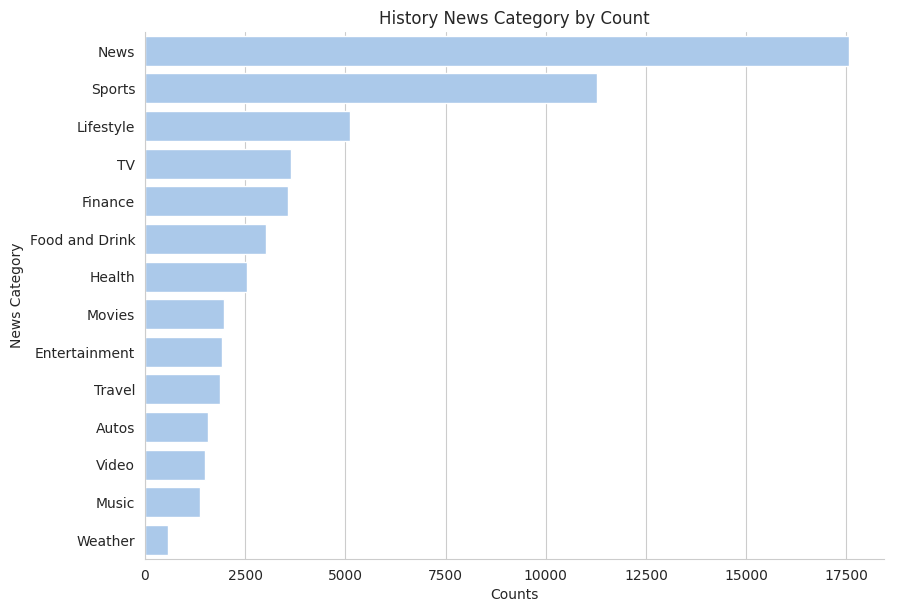

In [41]:
# Rename the columns
cat_hist['Category'] = cat_hist['Category'].replace({
    'sports': 'Sports','news': 'News', 'finance': 'Finance', 'travel': 'Travel', 'video': 'Video', 'lifestyle': 'Lifestyle', 'foodanddrink': 'Food and Drink',
    'weather': 'Weather', 'autos': 'Autos', 'health': 'Health', 'music': 'Music', 'tv': 'TV', 'entertainment': 'Entertainment', 'movies': 'Movies',
    'kids': 'Kids', 'middleeast': 'Middle East', 'games': 'Games', 'northamerica': 'North America'})

# Plot the count of news in history
hist_plot = sns.catplot(y='Category', kind='count', data=cat_hist, order=cat_hist['Category'].value_counts().index, height=6, aspect=1.5)

hist_plot.set(title='History News Category by Count', xlabel='Counts', ylabel='News Category')
plt.show()

In [42]:
# Merging news and behavior datasets

test_n_df['NewsId'] = test_n_df['NewsId'].astype(str)
exploded_test['History'] = exploded_test['History'].astype(str)

merged_df = pd.merge(test_n_df, exploded_test, left_on='NewsId', right_on='History')

print(merged_df.shape)
print(merged_df.head())

(57540, 12)
   NewsId Category  SubCat                                              Title  \
0  N53526   health  voices  I Was An NBA Wife. Here's How It Affected My M...   
1  N53526   health  voices  I Was An NBA Wife. Here's How It Affected My M...   
2  N53526   health  voices  I Was An NBA Wife. Here's How It Affected My M...   
3  N53526   health  voices  I Was An NBA Wife. Here's How It Affected My M...   
4  N53526   health  voices  I Was An NBA Wife. Here's How It Affected My M...   

                                            Abstract TitleEnt  \
0  I felt like I was a fraud, and being an NBA wi...       []   
1  I felt like I was a fraud, and being an NBA wi...       []   
2  I felt like I was a fraud, and being an NBA wi...       []   
3  I felt like I was a fraud, and being an NBA wi...       []   
4  I felt like I was a fraud, and being an NBA wi...       []   

                                         AbstractEnt Labels  ImpressionId  \
0  [{"Label": "National Basketbal

In [43]:
sampled_df = merged_df.sample(frac=0.01, random_state = 42)
print(sampled_df.shape)
print(sampled_df.head())

(575, 12)
       NewsId      Category              SubCat  \
9242   N36053  foodanddrink  restaurantsandnews   
56133  N48925          news           newsworld   
10074  N30698          news              newsus   
20879    N812       finance             markets   
2780   N38629            tv        tv-celebrity   

                                                   Title  \
9242   The one restaurant you need to visit in every ...   
56133  After Mormon Family's Terror in Mexico, a Mess...   
10074  Cranes remove bus partially swallowed by Pitts...   
20879  America is sitting on an excess of 40 million ...   
2780   Joe Giudice 'Feels Like a Weight Has Been Lift...   

                                                Abstract  \
9242   These 51 restaurants best represent regional c...   
56133  After Mormon Family's Terror in Mexico, a Mess...   
10074  A bus that was partially swallowed when a sink...   
20879  Data released by the U.S. Department of Agricu...   
2780   Joe Giudice Is 

In [44]:
sampled_df.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History
9242,N36053,foodanddrink,restaurantsandnews,The one restaurant you need to visit in every ...,These 51 restaurants best represent regional c...,[],[],[],13804,U66655,11/13/2019 11:13:47 AM,N36053
56133,N48925,news,newsworld,"After Mormon Family's Terror in Mexico, a Mess...","After Mormon Family's Terror in Mexico, a Mess...","[{""Label"": ""In Mexico"", ""Type"": ""W"", ""Wikidata...","[{""Label"": ""Mexico"", ""Type"": ""G"", ""WikidataId""...","[In_Mexico, Mormons]",121313,U26361,11/12/2019 8:26:12 AM,N48925
10074,N30698,news,newsus,Cranes remove bus partially swallowed by Pitts...,A bus that was partially swallowed when a sink...,"[{""Label"": ""Pittsburgh"", ""Type"": ""G"", ""Wikidat...","[{""Label"": ""Pittsburgh"", ""Type"": ""G"", ""Wikidat...",[Pittsburgh],119059,U12462,11/11/2019 12:33:12 PM,N30698
20879,N812,finance,markets,America is sitting on an excess of 40 million ...,Data released by the U.S. Department of Agricu...,"[{""Label"": ""United States"", ""Type"": ""G"", ""Wiki...","[{""Label"": ""United States Department of Agricu...",[United_States],118828,U15231,11/12/2019 5:34:52 PM,N812
2780,N38629,tv,tv-celebrity,Joe Giudice 'Feels Like a Weight Has Been Lift...,Joe Giudice Is 'Much Happier' After ICE Releas...,"[{""Label"": ""Teresa Giudice"", ""Type"": ""P"", ""Wik...","[{""Label"": ""Teresa Giudice"", ""Type"": ""P"", ""Wik...",[Teresa_Giudice],96032,U24015,11/14/2019 8:17:08 PM,N38629


In [45]:
# Removal of Entity(for titles)
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.tree import Tree
import string

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

def remove_entities(tokens):
    tags = pos_tag(tokens)
    tree = ne_chunk(tags)
    return [leaf[0] for leaf in tree if type(leaf) != Tree]

tokenized_news = [word_tokenize(t) for t in sampled_df['Title'].str.lower()]

tokenized_news = [[word for word in tokens if word not in string.punctuation] for tokens in tokenized_news]

stop_words = set(stopwords.words('english'))
tokenized_news = [[word for word in tokens if word not in stop_words] for tokens in tokenized_news]

tokenized_news = [remove_entities(tokens) for tokens in tokenized_news]

# Transform the list of words back to a Dataframe
processed_news = [' '.join(tokens) for tokens in tokenized_news]
#processed_news_column = pd.DataFrame(processed_news, columns=['Processed_Text'])
# or
sampled_df['Processed_Title'] = processed_news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
# Perform the TF-IDF measure
from sklearn.feature_extraction.text import TfidfVectorizer

# Min & Max document threshold， n-grams should be performed here
tfidf = TfidfVectorizer(stop_words='english', min_df=0.001, max_df=0.999, ngram_range=(1, 3))
text_vectors = tfidf.fit_transform(sampled_df['Title'])

In [47]:
print(tfidf.vocabulary_)

{'restaurant': 6130, 'need': 4946, 'visit': 7973, 'state': 7058, 'restaurant need': 6133, 'need visit': 4954, 'visit state': 7978, 'restaurant need visit': 6134, 'need visit state': 4955, 'mormon': 4811, 'family': 2628, 'terror': 7420, 'mexico': 4635, 'message': 4625, 'emerges': 2454, 'safe': 6370, 'mormon family': 4812, 'family terror': 2636, 'terror mexico': 7421, 'mexico message': 4636, 'message emerges': 4626, 'emerges safe': 2455, 'mormon family terror': 4813, 'family terror mexico': 2637, 'terror mexico message': 7422, 'mexico message emerges': 4637, 'message emerges safe': 4627, 'cranes': 1792, 'remove': 6037, 'bus': 1196, 'partially': 5317, 'swallowed': 7281, 'pittsburgh': 5505, 'sinkhole': 6825, 'cranes remove': 1793, 'remove bus': 6038, 'bus partially': 1198, 'partially swallowed': 5318, 'swallowed pittsburgh': 7282, 'pittsburgh sinkhole': 5506, 'cranes remove bus': 1794, 'remove bus partially': 6039, 'bus partially swallowed': 1199, 'partially swallowed pittsburgh': 5319, 's

In [48]:
print(text_vectors)

  (0, 4955)	0.35264010867212264
  (0, 6134)	0.35264010867212264
  (0, 7978)	0.35264010867212264
  (0, 4954)	0.35264010867212264
  (0, 6133)	0.35264010867212264
  (0, 7058)	0.2944955709670833
  (0, 7973)	0.31595498982635584
  (0, 4946)	0.2863370785599578
  (0, 6130)	0.33118068981285004
  (1, 4627)	0.23917231852295393
  (1, 4637)	0.23917231852295393
  (1, 7422)	0.23917231852295393
  (1, 2637)	0.23917231852295393
  (1, 4813)	0.23917231852295393
  (1, 2455)	0.23917231852295393
  (1, 4626)	0.23917231852295393
  (1, 4636)	0.23917231852295393
  (1, 7421)	0.23917231852295393
  (1, 2636)	0.23917231852295393
  (1, 4812)	0.23917231852295393
  (1, 6370)	0.23917231852295393
  (1, 2454)	0.23917231852295393
  (1, 4625)	0.23917231852295393
  (1, 4635)	0.22461782277357928
  (1, 7420)	0.23917231852295393
  :	:
  (574, 3940)	0.1880085239468856
  (574, 7033)	0.1880085239468856
  (574, 5039)	0.1880085239468856
  (574, 2539)	0.1880085239468856
  (574, 6670)	0.1880085239468856
  (574, 3187)	0.188008523946885

In [49]:
text_vectors.shape

(575, 8452)

In [50]:
!pip install nltk
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_and_lemmatized_tokens = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens]
    return stemmed_and_lemmatized_tokens

stemm_lemm_titles = []
for title in sampled_df['Processed_Title']:
    stemmed_and_lemmatized_tokens = process_text(title)
    stemm_lemm_titles.append(' '.join(stemmed_and_lemmatized_tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [51]:
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

w2v = Word2Vec(stemm_lemm_titles, sg=1, negative=5, vector_size=100, window=8, min_count=5, workers=4)

word_vectors = w2v.wv

# Create a DataFrame to store word vectors
word_vectors_df = pd.DataFrame(word_vectors.vectors, index=word_vectors.index_to_key)

# Rename columns
word_vectors_df.columns = [f"vector_{i+1}" for i in range(w2v.vector_size)]
word_vectors_df

,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,vector_10,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
,-0.030092,0.171236,0.092100,0.156189,-0.083490,-0.083842,0.051562,0.216954,-0.086152,-0.148128,...,0.048573,0.017110,0.052645,0.009750,0.212834,-0.099643,0.025934,-0.061010,0.015964,0.196905
e,-0.037899,0.187205,0.084076,0.156212,-0.017301,-0.085114,0.035932,0.247400,-0.127184,-0.145959,...,0.066378,0.024853,0.049642,-0.035982,0.171920,-0.080309,0.088111,-0.013084,0.012176,0.167479
a,-0.038937,0.230009,0.086497,0.153551,-0.072310,-0.089678,0.037063,0.274272,-0.149068,-0.160439,...,0.035965,0.047360,0.030781,0.011947,0.192862,-0.094998,0.068826,-0.020314,0.047811,0.172299
r,-0.012983,0.223417,0.110397,0.154666,-0.064786,-0.091530,0.036365,0.254187,-0.095942,-0.172787,...,0.021246,0.041321,0.022618,0.028224,0.210303,-0.105332,0.068060,-0.034088,0.029532,0.177099
i,-0.052219,0.235863,0.089705,0.173015,-0.067750,-0.089399,0.045590,0.281523,-0.154400,-0.160613,...,0.052709,0.023883,0.025282,-0.000698,0.146836,-0.092085,0.041159,-0.011014,0.024361,0.165478
o,-0.078345,0.176728,0.047289,0.131762,-0.056545,-0.077745,0.047879,0.221275,-0.136053,-0.124420,...,0.069835,0.045234,0.044470,-0.041707,0.195279,-0.082632,0.079896,-0.036343,0.038640,0.182051
t,-0.001940,0.198121,0.088221,0.173055,-0.047012,-0.093137,0.043566,0.247939,-0.138447,-0.153608,...,0.053841,0.025059,0.022989,-0.001190,0.154012,-0.081984,0.065175,-0.019244,0.016045,0.168553
n,-0.023475,0.185125,0.096578,0.163110,-0.045311,-0.091293,0.047479,0.248481,-0.130491,-0.163739,...,0.067192,0.020431,0.034934,-0.008214,0.172127,-0.090395,0.057596,-0.021657,0.024341,0.163674
s,-0.051471,0.223905,0.083821,0.173562,-0.054501,-0.086227,0.047331,0.261328,-0.153961,-0.148948,...,0.041171,0.048486,0.025722,-0.003814,0.175816,-0.082784,0.073496,-0.002664,0.044782,0.168028
l,-0.052808,0.196820,0.075406,0.170319,-0.052058,-0.097559,0.042979,0.253444,-0.133679,-0.158371,...,0.051919,0.043101,0.047887,0.001577,0.173694,-0.094364,0.041239,-0.014813,0.024312,0.184163


In [52]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import plotly.express as px

In [53]:
# Use PCA to reduce dimension to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(text_vectors.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

For n_clusters = 2 The average silhouette_score is : 0.9734407273911181
For n_clusters = 3 The average silhouette_score is : 0.9871361198703091
For n_clusters = 4 The average silhouette_score is : 0.9539159027272536
For n_clusters = 5 The average silhouette_score is : 0.9071203513970407
For n_clusters = 6 The average silhouette_score is : 0.9086885675270902
For n_clusters = 7 The average silhouette_score is : 0.891335988182705
For n_clusters = 8 The average silhouette_score is : 0.8914671127493575
For n_clusters = 9 The average silhouette_score is : 0.6384508445100978


Text(0.5, 1.0, 'Evaluating optimal k')

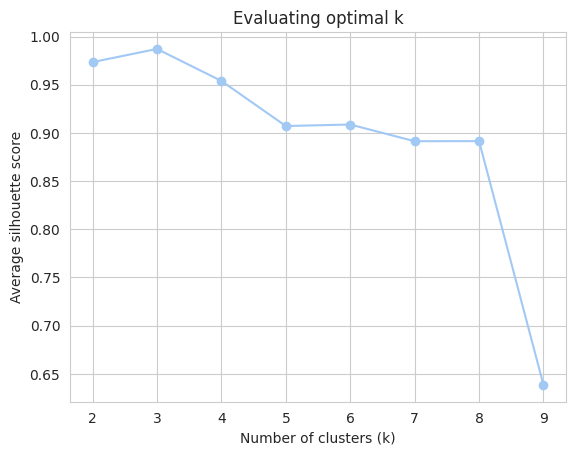

In [54]:
from sklearn.metrics import silhouette_score, silhouette_samples

opt_ks = range(2, 10)
sil_scores = []

# iterating through ks and list out avg silhouette_score
for k in opt_ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_vecs)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_vecs, labels)
    sil_scores.append(silhouette_avg)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

plt.plot(opt_ks, sil_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Evaluating optimal k')

In [55]:
# Performs K-Means clustering with K = 4
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(text_vectors)
cluster_labels = kmeans.labels_

In [56]:
text_vectors_df = pd.DataFrame(text_vectors)

text_vectors_df['cluster'] = cluster_labels
text_vectors_df['x0'] = pca_vecs[:, 0]
text_vectors_df['x1'] = pca_vecs[:, 1]

In [57]:
feature_names = tfidf.get_feature_names_out()

In [58]:
df = pd.DataFrame(text_vectors.todense(), columns=feature_names)
df['cluster'] = cluster_labels
df_grouped = df.groupby('cluster').mean()

def get_top_keywords(n_terms, text_vectors, feature_names, cluster_labels):
    for i, row in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([feature_names[t] for t in np.argsort(row)[-n_terms:]]))  # Make sure to use np.argsort(row)

get_top_keywords(10, text_vectors, feature_names, cluster_labels)


Cluster 0
customers, 10 best, according, 10, chains, 50, food, fast, fast food, best

Cluster 1
crossed median, suv, viral, school, goes, photo, long, lost, man, dog

Cluster 2
game, world, like, dead, nfl, 2019, news, new, says, trump

Cluster 3
missing alabama girl, body missing alabama, girl charged, body missing, alabama girl charged, missing alabama, alabama, alabama girl, girl, charged


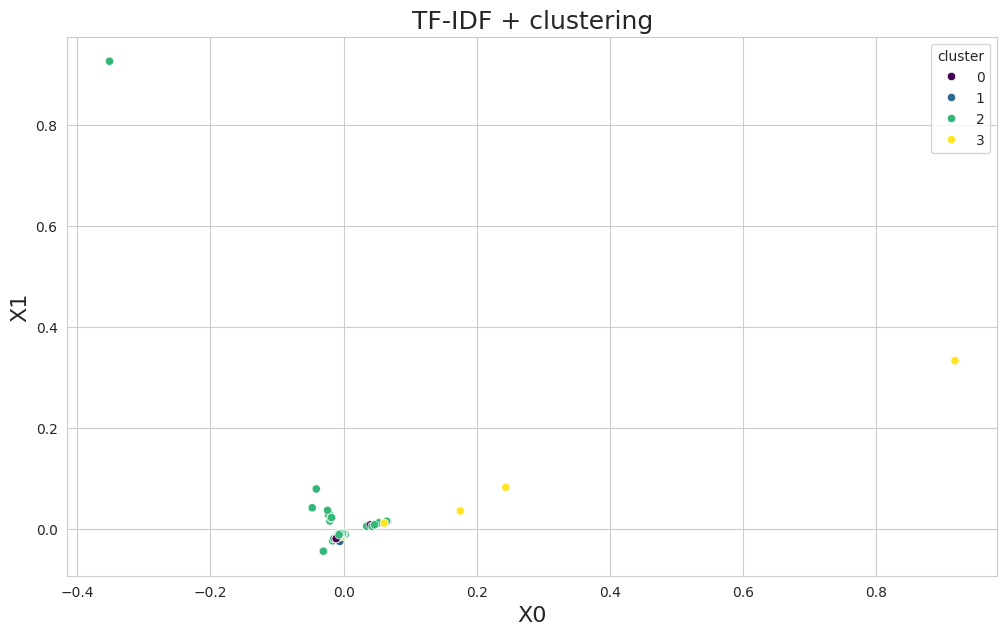

In [59]:
# Plot out the clustering result
import matplotlib.pyplot as plt
import seaborn as sns

text_vectors_df = text_vectors_df.reset_index()

plt.figure(figsize=(12, 7))
plt.title("TF-IDF + clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=text_vectors_df, x='x0', y='x1', hue='cluster', palette='viridis')

plt.show()

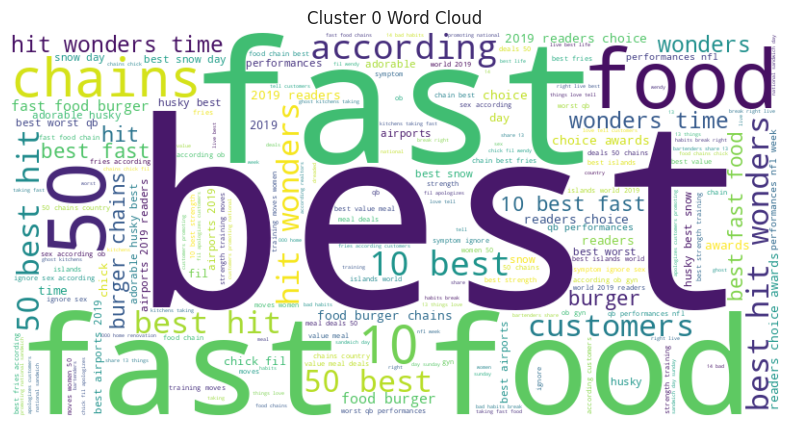

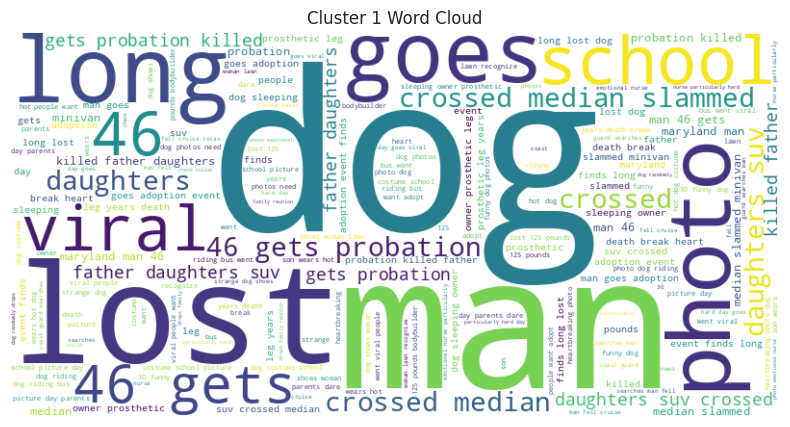

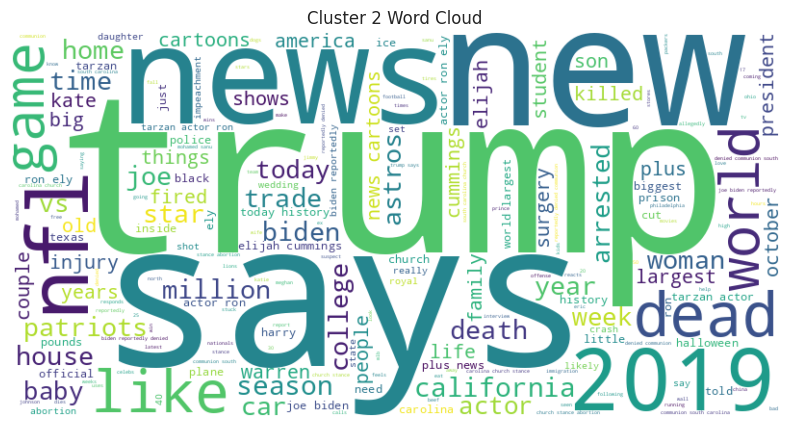

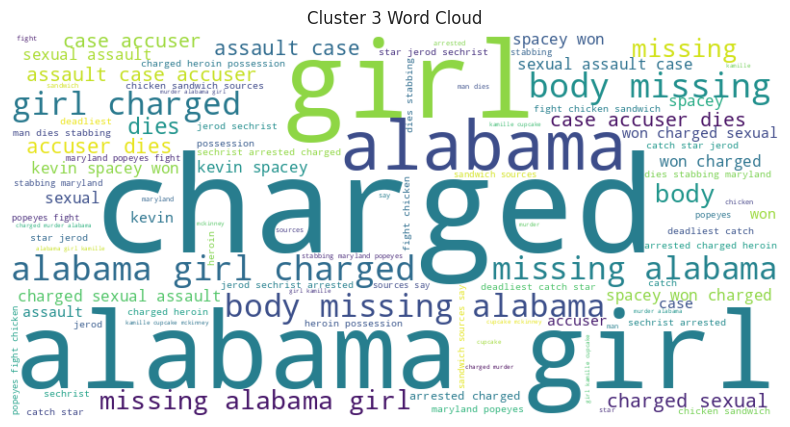

In [60]:
!pip install wordcloud
from wordcloud import WordCloud

word_freqs = {}
for i, feature_name in enumerate(feature_names):
    word_freqs[feature_name] = df.iloc[:, i].sum()

for cluster_id in range(4):
    # filter df based on kmeans clusters
    cluster_df = df[df['cluster'] == cluster_id]
    # dictionary of feature names and TF-IDF scores
    cluster_word_freqs = {}
    for i, feature_name in enumerate(feature_names):
        cluster_word_freqs[feature_name] = cluster_df.iloc[:, i].sum()
    # weights = word frequencies
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wc.generate_from_frequencies(cluster_word_freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Cluster {cluster_id} Word Cloud')
    plt.axis('off')
    plt.show()

In [61]:
# Use PCA to reduce dimension to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(word_vectors_df)

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

For n_clusters = 2 The average silhouette_score is : 0.6778759
For n_clusters = 3 The average silhouette_score is : 0.68252856
For n_clusters = 4 The average silhouette_score is : 0.46769178
For n_clusters = 5 The average silhouette_score is : 0.44641852
For n_clusters = 6 The average silhouette_score is : 0.4532169
For n_clusters = 7 The average silhouette_score is : 0.4351454
For n_clusters = 8 The average silhouette_score is : 0.43569714
For n_clusters = 9 The average silhouette_score is : 0.42429602


Text(0.5, 1.0, 'Evaluating optimal k')

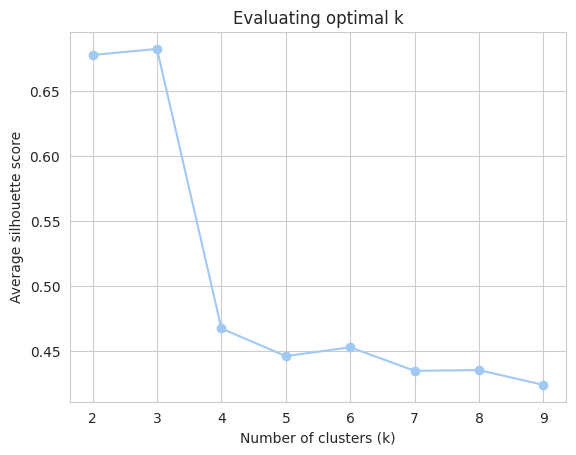

In [62]:
from sklearn.metrics import silhouette_score, silhouette_samples

opt_ks = range(2, 10)
sil_scores = []

# iterating through ks and list out avg silhouette_score
for k in opt_ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_vecs)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_vecs, labels)
    sil_scores.append(silhouette_avg)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

plt.plot(opt_ks, sil_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Evaluating optimal k')

In [63]:
# Performs K-Means clustering with K = 3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(word_vectors_df)
cluster_labels = kmeans.labels_

In [64]:
word_vectors_df['cluster'] = cluster_labels
word_vectors_df['x0'] = pca_vecs[:, 0]
word_vectors_df['x1'] = pca_vecs[:, 1]

In [65]:
feature_names = tfidf.get_feature_names_out()

In [66]:
#df = pd.DataFrame(text_vectors.todense(), columns=feature_names)
df = word_vectors_df
df['cluster'] = cluster_labels
df_grouped = df.groupby('cluster').mean()

def get_top_keywords(n_terms, word_vectors_df, feature_names, cluster_labels):
    for i, row in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([feature_names[t] for t in np.argsort(row)[-n_terms:]]))  # Make sure to use np.argsort(row)

get_top_keywords(10, word_vectors_df, feature_names, cluster_labels)


Cluster 0
16, 125 pounds, 14 bad, 13 animal, 101 years, 150th, 10, 100 incredible, 10 questions ask, 20

Cluster 1
101 years, 000 home, 17 photos, 100 incredible, 1978 smokey pontiac, 13 animal, 000 acres, 16, 10 questions ask, 10

Cluster 2
16 historically inaccurate, 102, 125 pounds, 16 michigan vs, 14 bad, 101 years, 100 incredible, 10 questions ask, 150th, 20


In [67]:
word_vectors_df = word_vectors_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Check if there are any NaN values after conversion
if word_vectors_df.isnull().any().any():
    # Handle NaN values. Here, we replace NaN with 0
    word_vectors_df = word_vectors_df.fillna(0)

In [68]:
from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(word_vectors_df)

x = []
y = []
for value in new_values:
  x.append(value[0])
  y.append(value[1])

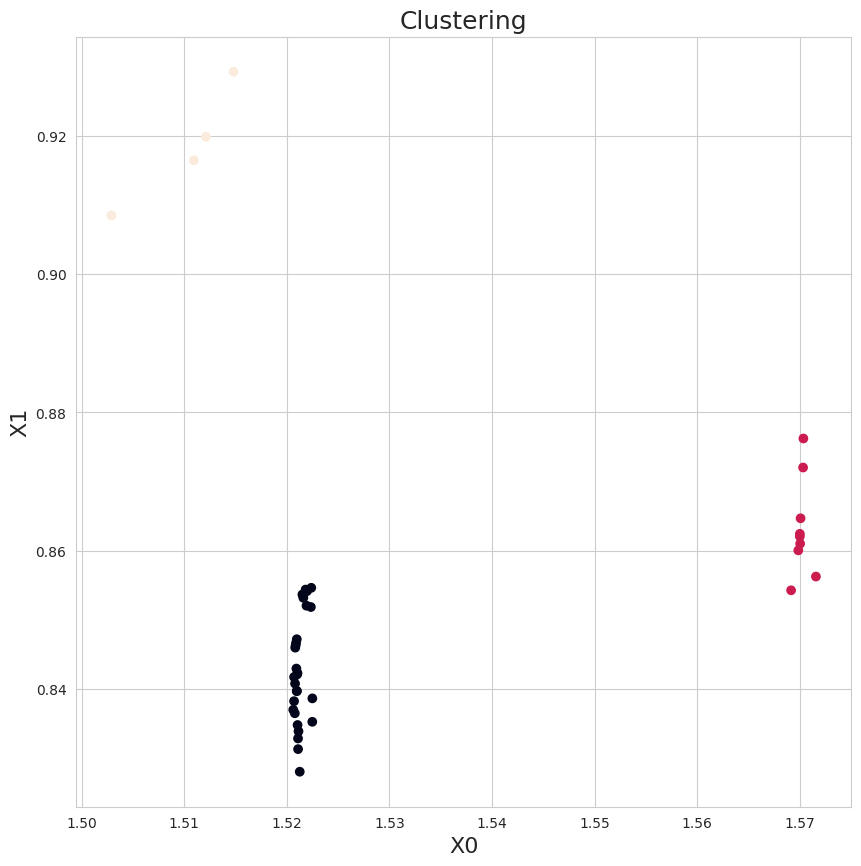

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(new_values)
labels = kmeans.labels_

plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=labels)
plt.title("Clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
plt.show()

In [70]:
text_vectors_df = pd.DataFrame(text_vectors)

In [71]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import DBSCAN
from scipy.sparse import coo_matrix

dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(word_vectors_df)

DBSCAN(eps=1, min_samples=2)

In [72]:
cluster_labels = dbscan.labels_
coords = word_vectors_df
no_clusters = len(np.unique(cluster_labels) )
no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 0


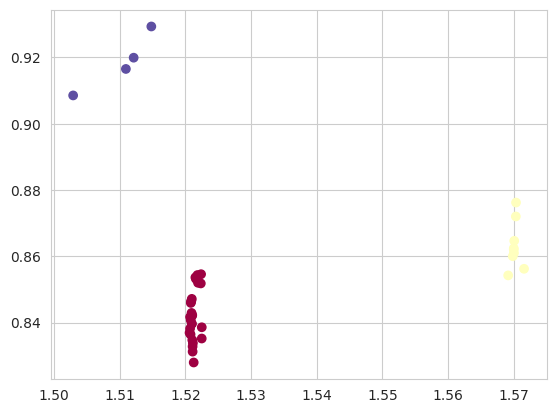

In [73]:
unique_labels = set(cluster_labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

cluster_colors = {label: color for label, color in zip(unique_labels, colors)}

point_colors = [cluster_colors[label] for label in cluster_labels]

plt.scatter(x, y, c=point_colors, marker='o')
plt.show()

In [74]:
nltk.download('stopwords')
nltk.download('punkt')

# Create a new dataframe and clean it for tokenization
sent = sampled_df.copy()
sent["text_prcessed"] = sent["Title"].str.lower()
sent["text_prcessed"] = sent["text_prcessed"].replace('<br />', ' ', regex=True)
sent["text_prcessed"] = sent["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)
sent.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History,Processed_Title,text_prcessed
9242,N36053,foodanddrink,restaurantsandnews,The one restaurant you need to visit in every ...,These 51 restaurants best represent regional c...,[],[],[],13804,U66655,11/13/2019 11:13:47 AM,N36053,one restaurant need visit every state,the one restaurant you need to visit in every ...
56133,N48925,news,newsworld,"After Mormon Family's Terror in Mexico, a Mess...","After Mormon Family's Terror in Mexico, a Mess...","[{""Label"": ""In Mexico"", ""Type"": ""W"", ""Wikidata...","[{""Label"": ""Mexico"", ""Type"": ""G"", ""WikidataId""...","[In_Mexico, Mormons]",121313,U26361,11/12/2019 8:26:12 AM,N48925,mormon family 's terror mexico message emerges...,after mormon family s terror in mexico a mess...
10074,N30698,news,newsus,Cranes remove bus partially swallowed by Pitts...,A bus that was partially swallowed when a sink...,"[{""Label"": ""Pittsburgh"", ""Type"": ""G"", ""Wikidat...","[{""Label"": ""Pittsburgh"", ""Type"": ""G"", ""Wikidat...",[Pittsburgh],119059,U12462,11/11/2019 12:33:12 PM,N30698,cranes remove bus partially swallowed pittsbur...,cranes remove bus partially swallowed by pitts...
20879,N812,finance,markets,America is sitting on an excess of 40 million ...,Data released by the U.S. Department of Agricu...,"[{""Label"": ""United States"", ""Type"": ""G"", ""Wiki...","[{""Label"": ""United States Department of Agricu...",[United_States],118828,U15231,11/12/2019 5:34:52 PM,N812,america sitting excess 40 million pounds uneat...,america is sitting on an excess of 40 million ...
2780,N38629,tv,tv-celebrity,Joe Giudice 'Feels Like a Weight Has Been Lift...,Joe Giudice Is 'Much Happier' After ICE Releas...,"[{""Label"": ""Teresa Giudice"", ""Type"": ""P"", ""Wik...","[{""Label"": ""Teresa Giudice"", ""Type"": ""P"", ""Wik...",[Teresa_Giudice],96032,U24015,11/14/2019 8:17:08 PM,N38629,joe giudice 'feels like weight lifted ice rele...,joe giudice feels like a weight has been lift...


In [75]:
# Tokenize the column
sent["text_prcessed"] = sent["text_prcessed"].astype(str)
tokenized_titles = [word_tokenize(word) for word in sent["text_prcessed"]]

In [76]:
# Define the stop words and filter out them
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(tokenized_titles):
  tokenized_titles[indx] = [word for word in tokens if word not in stop_words]


sent["tokenized"] = tokenized_titles
sent.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History,Processed_Title,text_prcessed,tokenized
9242,N36053,foodanddrink,restaurantsandnews,The one restaurant you need to visit in every ...,These 51 restaurants best represent regional c...,[],[],[],13804,U66655,11/13/2019 11:13:47 AM,N36053,one restaurant need visit every state,the one restaurant you need to visit in every ...,"[one, restaurant, need, visit, every, state]"
56133,N48925,news,newsworld,"After Mormon Family's Terror in Mexico, a Mess...","After Mormon Family's Terror in Mexico, a Mess...","[{""Label"": ""In Mexico"", ""Type"": ""W"", ""Wikidata...","[{""Label"": ""Mexico"", ""Type"": ""G"", ""WikidataId""...","[In_Mexico, Mormons]",121313,U26361,11/12/2019 8:26:12 AM,N48925,mormon family 's terror mexico message emerges...,after mormon family s terror in mexico a mess...,"[mormon, family, terror, mexico, message, emer..."
10074,N30698,news,newsus,Cranes remove bus partially swallowed by Pitts...,A bus that was partially swallowed when a sink...,"[{""Label"": ""Pittsburgh"", ""Type"": ""G"", ""Wikidat...","[{""Label"": ""Pittsburgh"", ""Type"": ""G"", ""Wikidat...",[Pittsburgh],119059,U12462,11/11/2019 12:33:12 PM,N30698,cranes remove bus partially swallowed pittsbur...,cranes remove bus partially swallowed by pitts...,"[cranes, remove, bus, partially, swallowed, pi..."
20879,N812,finance,markets,America is sitting on an excess of 40 million ...,Data released by the U.S. Department of Agricu...,"[{""Label"": ""United States"", ""Type"": ""G"", ""Wiki...","[{""Label"": ""United States Department of Agricu...",[United_States],118828,U15231,11/12/2019 5:34:52 PM,N812,america sitting excess 40 million pounds uneat...,america is sitting on an excess of 40 million ...,"[america, sitting, excess, 40, million, pounds..."
2780,N38629,tv,tv-celebrity,Joe Giudice 'Feels Like a Weight Has Been Lift...,Joe Giudice Is 'Much Happier' After ICE Releas...,"[{""Label"": ""Teresa Giudice"", ""Type"": ""P"", ""Wik...","[{""Label"": ""Teresa Giudice"", ""Type"": ""P"", ""Wik...",[Teresa_Giudice],96032,U24015,11/14/2019 8:17:08 PM,N38629,joe giudice 'feels like weight lifted ice rele...,joe giudice feels like a weight has been lift...,"[joe, giudice, feels, like, weight, lifted, ic..."


In [77]:
# Take a sample from the original dataset
unique_news = test_n_df['NewsId'].unique()
sampled_news = pd.Series(unique_news).sample(frac=0.1, random_state=42)
sampled_news = test_n_df[test_n_df['NewsId'].isin(sampled_news)]

sampled_news.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...",[Skin_tag]
34,N46013,foodanddrink,recipes,20 Must-Try Gravy Recipes for Your Thanksgivin...,Turkey just isn't the same without it.,[],[],[]
40,N43647,news,newsphotos,POWER RANKING: Here's who has the best chance ...,We've combined Insider polling and results of ...,[],"[{""Label"": ""Insider Inc."", ""Type"": ""N"", ""Wikid...",[]
62,N3395,tv,tv-gallery,TV shows we're most excited about for the rest...,"From HBO originals like ""His Dark Materials"" t...",[],"[{""Label"": ""HBO"", ""Type"": ""O"", ""WikidataId"": ""...",[]
70,N52386,foodanddrink,restaurantsandnews,16 major chains where you can buy plant-based ...,Plant-based burgers are coming into the mainst...,[],"[{""Label"": ""Beyond Meat"", ""Type"": ""O"", ""Wikida...",[]


In [78]:
sampled_news["text_prcessed"] = sampled_news["Title"].str.lower()
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].replace('<br />', ' ', regex=True)
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)
sampled_news.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,text_prcessed
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...",[Skin_tag],how to get rid of skin tags according to a de...
34,N46013,foodanddrink,recipes,20 Must-Try Gravy Recipes for Your Thanksgivin...,Turkey just isn't the same without it.,[],[],[],20 must try gravy recipes for your thanksgivin...
40,N43647,news,newsphotos,POWER RANKING: Here's who has the best chance ...,We've combined Insider polling and results of ...,[],"[{""Label"": ""Insider Inc."", ""Type"": ""N"", ""Wikid...",[],power ranking here s who has the best chance ...
62,N3395,tv,tv-gallery,TV shows we're most excited about for the rest...,"From HBO originals like ""His Dark Materials"" t...",[],"[{""Label"": ""HBO"", ""Type"": ""O"", ""WikidataId"": ""...",[],tv shows we re most excited about for the rest...
70,N52386,foodanddrink,restaurantsandnews,16 major chains where you can buy plant-based ...,Plant-based burgers are coming into the mainst...,[],"[{""Label"": ""Beyond Meat"", ""Type"": ""O"", ""Wikida...",[],16 major chains where you can buy plant based ...


In [79]:
# Tokenize the column
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].astype(str)
tokenized_news = [word_tokenize(word) for word in sampled_news["text_prcessed"]]

# Define the stop words and filter out them
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(tokenized_news):
  tokenized_news[indx] = [word for word in tokens if word not in stop_words]


sampled_news["tokenized"] = tokenized_news
sampled_news.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,text_prcessed,tokenized
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...",[Skin_tag],how to get rid of skin tags according to a de...,"[get, rid, skin, tags, according, dermatologist]"
34,N46013,foodanddrink,recipes,20 Must-Try Gravy Recipes for Your Thanksgivin...,Turkey just isn't the same without it.,[],[],[],20 must try gravy recipes for your thanksgivin...,"[20, must, try, gravy, recipes, thanksgiving, ..."
40,N43647,news,newsphotos,POWER RANKING: Here's who has the best chance ...,We've combined Insider polling and results of ...,[],"[{""Label"": ""Insider Inc."", ""Type"": ""N"", ""Wikid...",[],power ranking here s who has the best chance ...,"[power, ranking, best, chance, becoming, 2020,..."
62,N3395,tv,tv-gallery,TV shows we're most excited about for the rest...,"From HBO originals like ""His Dark Materials"" t...",[],"[{""Label"": ""HBO"", ""Type"": ""O"", ""WikidataId"": ""...",[],tv shows we re most excited about for the rest...,"[tv, shows, excited, rest, year]"
70,N52386,foodanddrink,restaurantsandnews,16 major chains where you can buy plant-based ...,Plant-based burgers are coming into the mainst...,[],"[{""Label"": ""Beyond Meat"", ""Type"": ""O"", ""Wikida...",[],16 major chains where you can buy plant based ...,"[16, major, chains, buy, plant, based, version..."


In [80]:
from gensim import corpora, models

# Create the corpus
dictionary = corpora.Dictionary(sent['tokenized'])
corpus = [dictionary.doc2bow(tokens) for tokens in sent['tokenized']]

# Set the number of topics we want to check
num_topics = 10
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
  print(topic)

(0, '0.011*"new" + 0.009*"says" + 0.008*"us" + 0.007*"couple" + 0.006*"trump"')
(1, '0.012*"says" + 0.008*"actor" + 0.008*"killed" + 0.007*"america" + 0.007*"allegedly"')
(2, '0.007*"dog" + 0.007*"biden" + 0.007*"joe" + 0.007*"reportedly" + 0.007*"south"')
(3, '0.014*"charged" + 0.011*"missing" + 0.008*"2" + 0.008*"alabama" + 0.008*"girl"')
(4, '0.012*"says" + 0.006*"3" + 0.006*"weight" + 0.006*"release" + 0.005*"joe"')
(5, '0.009*"star" + 0.007*"week" + 0.006*"1" + 0.006*"2019" + 0.006*"game"')
(6, '0.011*"new" + 0.007*"costume" + 0.006*"parents" + 0.006*"news" + 0.006*"back"')
(7, '0.022*"trump" + 0.008*"says" + 0.006*"take" + 0.005*"5" + 0.005*"inside"')
(8, '0.008*"trump" + 0.008*"man" + 0.006*"baby" + 0.006*"game" + 0.006*"interview"')
(9, '0.006*"u" + 0.006*"bill" + 0.004*"6" + 0.004*"vs" + 0.004*"old"')


In [81]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Apply sentiment analysis using a lexicon
sia = SentimentIntensityAnalyzer()
sampled_news['sentiment_score'] = sampled_news['tokenized'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])

# Classify sentiment based on the sentiment score
sampled_news['sentiment'] = sampled_news['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Create the result dataframe
news_result = sampled_news[['Title', 'sentiment_score', 'sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Text(0.5, 1.0, 'News Title Sentiment')

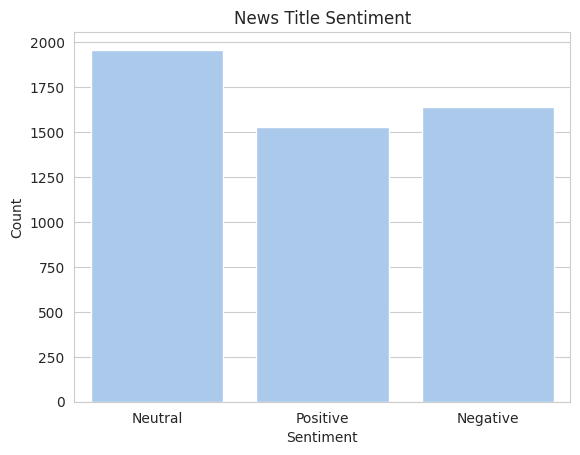

In [82]:
# Graph the sentiment result
sns.countplot(x = 'sentiment', data = news_result)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('News Title Sentiment')

In [83]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Apply sentiment analysis using a lexicon
sia = SentimentIntensityAnalyzer()
sent['sentiment_score'] = sent['tokenized'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])

# Classify sentiment based on the sentiment score
sent['sentiment'] = sent['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Create the result dataframe
sent_result = sent[['Title', 'sentiment_score', 'sentiment']]
sent_result

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,sentiment_score,sentiment
9242,The one restaurant you need to visit in every ...,0.0000,Neutral
56133,"After Mormon Family's Terror in Mexico, a Mess...",-0.1280,Negative
10074,Cranes remove bus partially swallowed by Pitts...,0.0000,Neutral
20879,America is sitting on an excess of 40 million ...,0.0000,Neutral
2780,Joe Giudice 'Feels Like a Weight Has Been Lift...,0.3612,Positive
...,...,...,...
5770,The 2019 NFL Season,0.0000,Neutral
39510,8chan returns without its most notorious commu...,0.3412,Positive
22073,Property Brothers' J.D. Scott Marries Annalee ...,0.0000,Neutral
1879,10 of the best fast-food burger chains across ...,0.6369,Positive


Text(0.5, 1.0, 'News Title Sentiment')

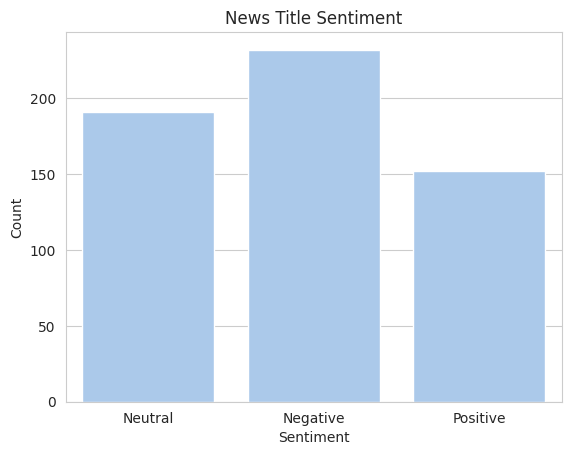

In [84]:
# Graph the sentiment result
sns.countplot(x = 'sentiment', data = sent_result)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('News Title Sentiment')